<a href="https://colab.research.google.com/github/hernanmorales-navarrete/Image_Processing/blob/main/Fourier_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Fourier transforms

It is an extension of the 1D Fourier transform of signals defined in 2D:

$$F_{k_x, k_y} = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}{f(x,y)\cdot e^{-i2\pi({k_x x/M} + k_y y/N)}}$$


The inverse 2D Fourier transform becomes:

$$f_{x, y} = \frac{1}{MN}\sum_{k_x=0}^{M-1}\sum_{k_y=0}^{N-1}{F(k_x,k_y)\cdot e^{i2\pi({k_x x/M} + k_y y/N)}}$$


To find the characteristic temporal or spatial frequencies of 2D signals, we can use the 2D FFT function included in numpy (np.fft.fft2).


https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html


## Summary of the process:

To compute the FFT of a 2D signal:

1. Fourier transform the 2D signal applying the fft.fft2() function. The result is a 2D Fourier image where low frequencies are at the edges.


2. Therefore, we need to shift them so that the low frequencies are at the centre of the spectrum. We apply the fft.fftshift() function to accomplish this.


3. The Fourier Transform (FFT) of a discrete signal (like an image) produces frequency components that are not directly scaled to match the original amplitudes. To obtain the correct amplitude representation of the original signal, we need to normalize the Fourier transform by dividing it by the total number of pixels in the image


4. Then, we compute the frequencies using the function fft.fftfreq(). The resulting frequencies are in vectors where the first elment is 0, followed by positive elements, and by negative elements.


5. Therefore, we need to sort them and then create a mesh grid based on the sorted values.


6. Once we have the mesh and the Fourier image, we just need to interpolate the surface onto a 3D Cartesian system or onto a 2D plane.


7. And we check if the frequencies we got are correct.

## Example 1:

Given the matrix signal_2D, defined as:

\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}

Calculate its 2D DFT.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
signal_2D = np.array([[1, 2],[3, 4]])

print(signal_2D)

[[1 2]
 [3 4]]


In [ ]:
fourier_2D = np.fft.fft2(signal_2D)

print(fourier_2D)

[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


## Example 2:

Given the matrix signal_2D, defined as:

$f(x, y) = sin(\alpha x)$

Calculate its 2D FFT.

In [ ]:
def function_2D(x, y, alpha):
    return np.sin(alpha*x)

In [ ]:
d_spacing = 0.001

x = np.arange(0, 1, d_spacing)
y = np.arange(0, 1, d_spacing)

alpha = 10*np.pi  # nu is = 5Hz  or = 5m^-1

X, Y = np.meshgrid(x, y)
Z_f = function_2D(X, Y, alpha)

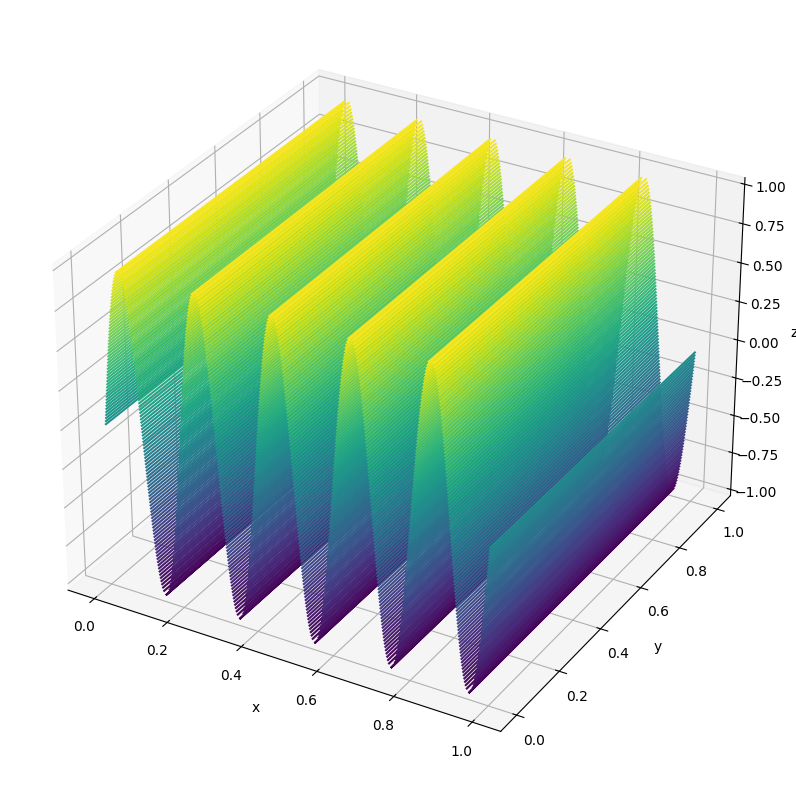

In [ ]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

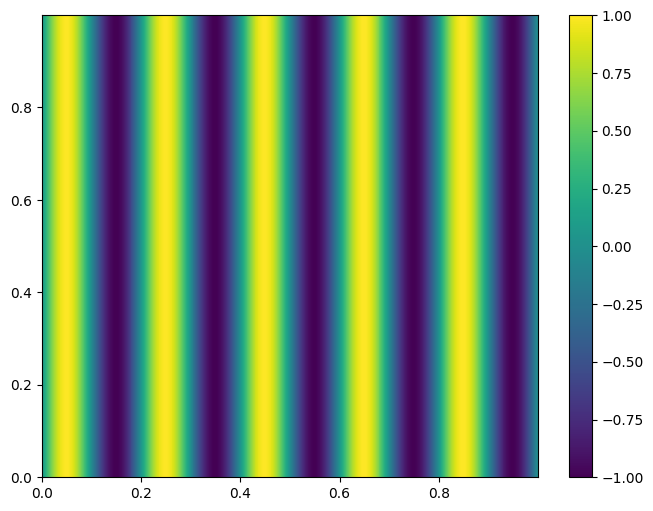

In [ ]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(X, Y, Z_f, cmap = "viridis")

plt.colorbar(Z1)

plt.show()

### Fourier transform in 2D

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html

In [ ]:
print(Z_f.shape)

(1000, 1000)


In [ ]:
# Unshifted Fourier signal

fourier_Z_f = np.fft.fft2(Z_f)

# Shifted signal:
shifted_fourier_Z_f = np.fft.fftshift(fourier_Z_f)
print(fourier_Z_f.shape)

# Norms
norm_fourier_Z_f = np.abs(fourier_Z_f)
norm_shifted_Z_f = np.abs(shifted_fourier_Z_f)

print(np.amax(norm_fourier_Z_f))
print(np.amax(norm_shifted_Z_f))

(1000, 1000)
500000.0000000002
500000.0000000002


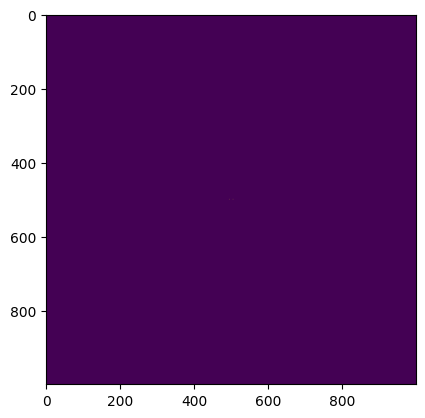

In [ ]:
# Plotting Fourier image:

%matplotlib inline
plt.imshow(norm_shifted_Z_f)

### Spatial Frequencies:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [ ]:
freqs_x = np.fft.fftfreq(Z_f.shape[0], d=d_spacing)
freqs_y = np.fft.fftfreq(Z_f.shape[1], d=d_spacing)

#print(freqs_x)

# Creating mesh:

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

### Fourier image on the frequency mesh:

### Unshifted Fourier signal:

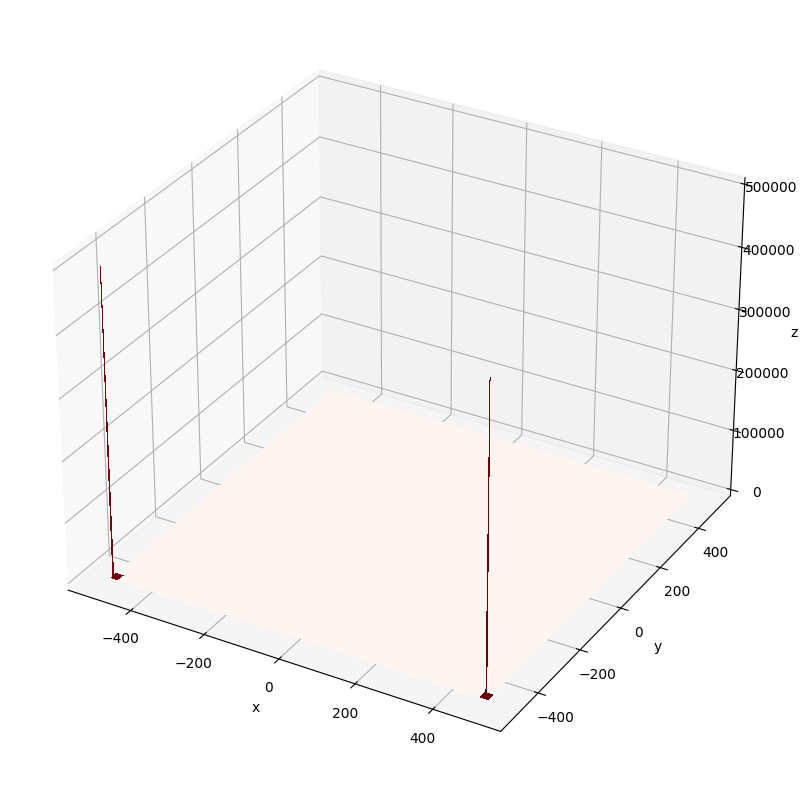

In [ ]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Shifted Fourier transform:

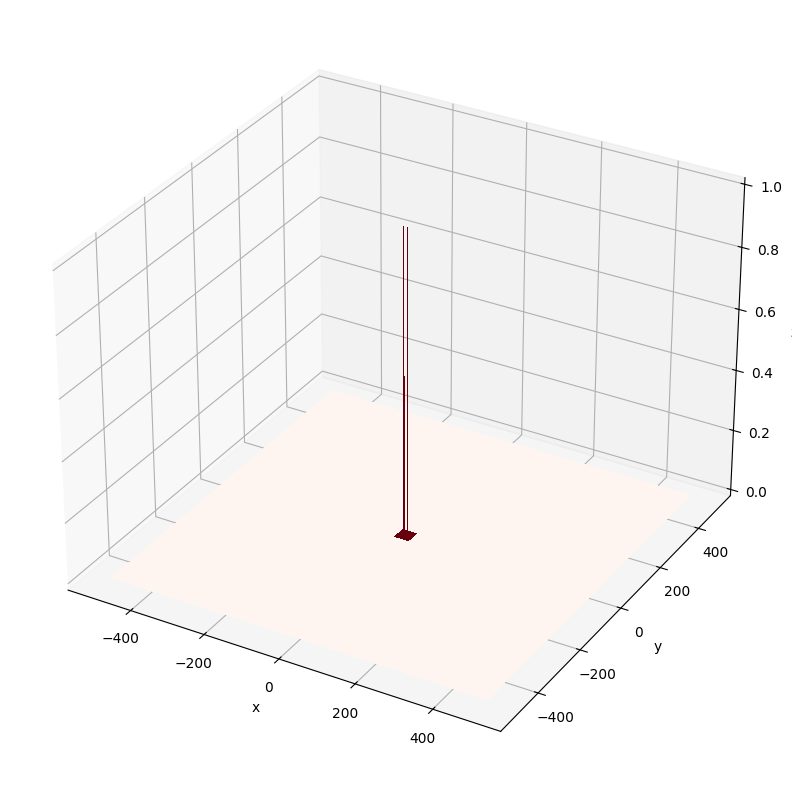

In [ ]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, (2/norm_shifted_Z_f.size)*norm_shifted_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## 2D projection of the Fourier transform:

<ipython-input-25-93ec3dec4540>:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f), cmap = "Reds", vmin = -1, vmax= 1)


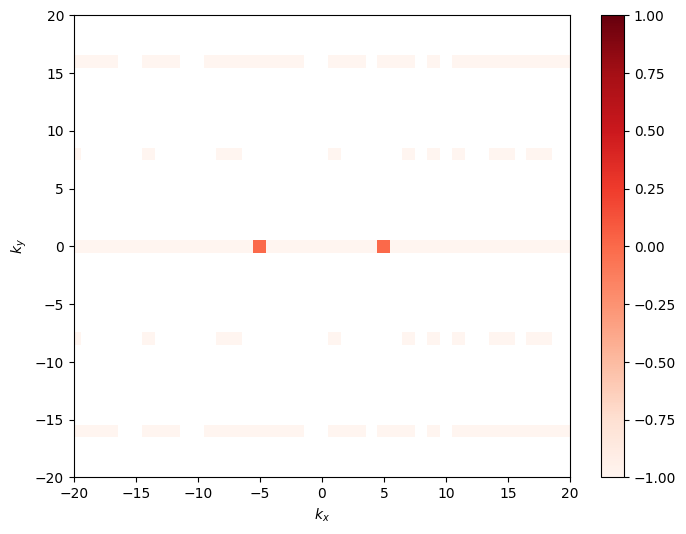

In [ ]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f), cmap = "Reds", vmin = -1, vmax= 1)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.colorbar(Z1)

plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()

In [ ]:
slice_ky0 = np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[norm_shifted_Z_f.shape[0]//2,:]

slice_ky0_2 = ((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[500,:]

print(slice_ky0.shape)

(1000,)


<ipython-input-26-cf3303852d98>:1: RuntimeWarning: divide by zero encountered in log10
  slice_ky0 = np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[norm_shifted_Z_f.shape[0]//2,:]


(-20.0, 20.0)

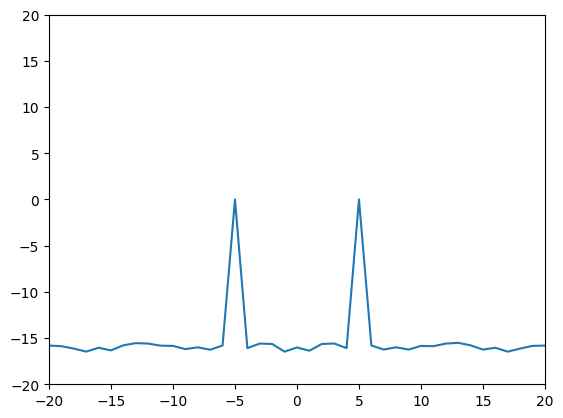

In [ ]:
%matplotlib inline

plt.plot(sorted(freqs_x),slice_ky0)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

(0.0, 2.0)

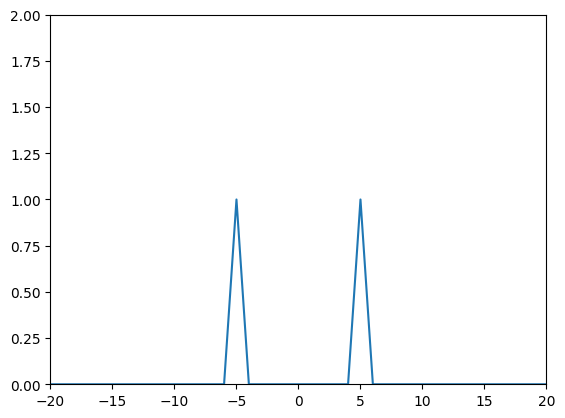

In [ ]:
%matplotlib inline

plt.plot(sorted(freqs_x),slice_ky0_2)

plt.xlim(-20, 20)
plt.ylim(0, 2)

## Exercise:

Given the following 2D functions:

$f_1(x,y) = \sin(\alpha\,x)+ \sin(4\alpha\,x)$

$f_2(x,y) = \sin(\alpha\,x) + \sin(4\alpha\,x) + \sin(8\alpha\,x) + \sin(2\alpha\,y)$

(a) Make a 3D plot of the surfaces they represent.


(b) Make 2D projections of these surfaces onto the XY plane.


(c) Calculate their 2D Fourier transforms, including the frequency axes.


(d) Calculate their characteristic (spatial) frequencies and compare with the analytical inputs.

# Fourier filtering in 2D


## Exercise:

Given the following 2D functions:

$f_1(x,y) = \sin(\alpha\,x)+ \sin(4\alpha\,x)$

(a) Make a 3D plot of the surfaces they represent.


(b) Make 2D projections of these surfaces onto the XY plane.


(c) Calculate their 2D Fourier transforms, including the frequency axes.


(d) Calculate their characteristic (spatial) frequencies and compare with the analytical inputs.


(e) Apply a low-pass filter to remove the highest frequency component.